In [1]:
import uproot 
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplhep as hep
import awkward as ak
import pandas as pd
import numpy as np
import seaborn as sns
import sys,os
import hist
sys.path.append("/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/lib")
from utils import *
from setting import setting


In [3]:
year = '2018'; cutcat = 'resolved'
cat = '2lep'; tag='all'; var = 'mass2jet'

In [4]:
h = GetHisto(year,cutcat).hist

In [5]:
hist_data = h[cutcat][f'Data_CR_{cat}_{tag}_{var}']

In [15]:
hist_data[hist.loc(40):hist.loc(70)]

Hist(Regular(6, 40, 70, name='M(jj)'), storage=Weight()) # Sum: WeightedSum(value=68321, variance=68321) (WeightedSum(value=139461, variance=139461) with flow)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fc436431b50>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

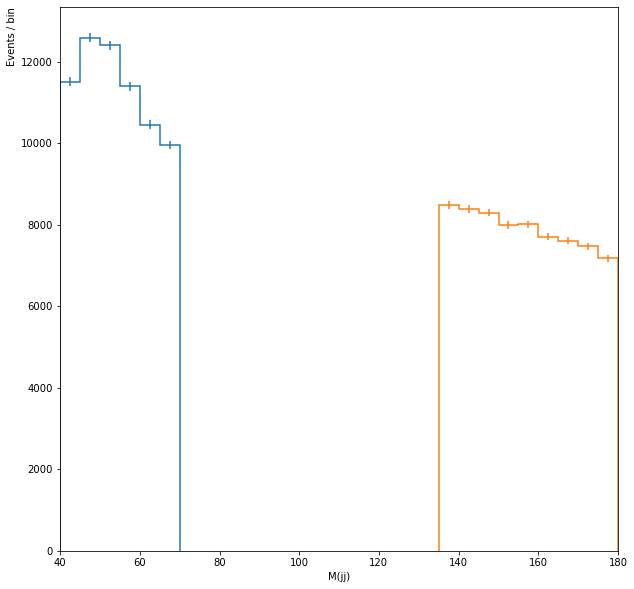

In [18]:
f, ax = plt.subplots(figsize=(10, 10))
#hep.cms.label(data=True, llabel='Preliminary',year=self.year, ax=ax, rlabel=r'%s $fb^{-1}$ (13 TeV)'%self.config['lumi'][self.year], fontname='sans-serif')
ax.set_xlim(40, 180); ax.set_ylabel('Events / bin', ha='right', y=1.0)
hep.histplot(hist_data[hist.loc(40):hist.loc(70)])
hep.histplot(hist_data[hist.loc(135):hist.loc(180)])

In [17]:
fileP = "/cms/user/guojl/Sample/2L2Q/UL_Legacy/2018/MC/ggh/skimed/ggh.root"
f = uproot.open(fileP)

In [18]:
arr = f['passedEvents'].arrays(filter_name = ['jet*','found*','pt*','mergedjet*','mass*','particleNetZvsQCD'])

In [4]:
selection = '(foundZ1LCandidate==True) & (foundZ2JCandidate==True) '
cut_array = ak.numexpr.evaluate(selection,arr)
arr_cut = arr[cut_array]

In [7]:
nbins = 120; low = 0; high = 1200
h_mean = hist.Hist(hist.axis.Regular(bins=nbins, start=low, stop=high, name="pt"))
h_mean.fill(arr_cut.jet_1_pt); h_mean.fill(arr_cut.jet_2_pt)
h_up = hist.Hist(hist.axis.Regular(bins=nbins, start=low, stop=high, name="pt"))
h_up.fill(arr_cut.jetpt_1_jesup_split_Total); h_up.fill(arr_cut.jetpt_2_jesup_split_Total)
h_dn = hist.Hist(hist.axis.Regular(bins=nbins, start=low, stop=high, name="pt"))
h_dn.fill(arr_cut.jetpt_1_jesdn_split_Total); h_dn.fill(arr_cut.jetpt_2_jesdn_split_Total)

Hist(Regular(50, 30, 130, name='pt'), storage=Double()) # Sum: 22489.0 (33386.0 with flow)

In [8]:
print(h_dn.axes)
print(h_mean.axes)

(Regular(50, 30, 130, name='pt'),)
(Regular(50, 30, 130, name='pt'),)


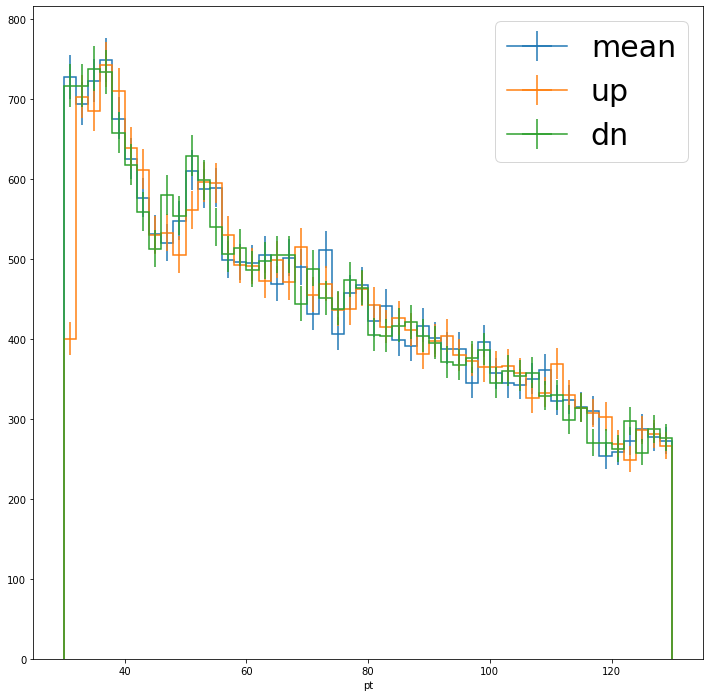

In [9]:
fig = plt.figure(figsize=(12,12))
hep.histplot(h_mean,label = "mean")
hep.histplot(h_up,label='up')
hep.histplot(h_dn,label='dn')
plt.legend(loc=1,fontsize=30)

In [12]:
def GetUncFromUpDn(h_mean,h_up,h_dn):
    mean = h_mean.values().sum()
    h_mean_up  = h_mean - h_up
    mean_up = abs(h_mean_up.values()).sum()
    h_mean_dn = h_mean - h_dn
    mean_dn = abs(h_mean_dn.values()).sum()
    uncUp = mean_up/mean
    uncDn = mean_dn/mean
    return uncUp, uncDn

In [13]:
up,dn = GetUncFromUpDn(h_mean,h_up,h_dn)

In [16]:
type(h_mean)

hist.hist.Hist

In [4]:
arr = uproot.lazy(['/cms/user/guojl/Sample/2L2Q/UL_Legacy/2018/MC/sig/skimed/GluGluHToZZTo2L2Q_M500_TuneCP5_13TeV_powheg2_JHUGenV7011_pythia8__v16_L1v1-v1_0.root:passedEvents'])

In [19]:
config = setting().config

In [25]:
cut = "(foundZ2JCandidate_up==True) & (mass2l2jet_up>450)"
#cut = "((mass2jet_up<70) | (mass2jet_up>135)) & (foundZ1LCandidate==True) & (foundZ2JCandidate_up==True) & (mass2l2jet_up)>450 & (KD_jjVBF_up<0.5) & (isEE==True) & (jet_1_deepbtag_up>0.2770) & (jet_2_deepbtag_up>0.2770)"
cut_arr = ak.numexpr.evaluate(cut,arr)


In [16]:
leptonic_cut_cats=['isEE','isMuMu','2lep']
regions = ['CR','SR','ALL']
tags = ['btag','untag','vbftag','all']
for reg in regions:
    for cat in leptonic_cut_cats:
        for tag in tags:
            selection = config['cut']['resolved_up'][reg][cat][tag]
            print(selection)
            cut_arr = ak.numexpr.evaluate(selection,arr)
            cut_event = arr[cut_arr]

((mass2jet_up<70) | (mass2jet_up>135)) & (foundZ1LCandidate==True) & (foundZ2JCandidate_up==True) & (mass2l2jet_up)>450 & (KD_jjVBF_up<0.5) & (isEE==True) & (jet_1_deepbtag_up>0.2770) & (jet_2_deepbtag_up>0.2770)


TypeError: unsupported operand type(s) for &: 'int' and 'OpNode'

In [18]:
arr.mass2l2jet_up>450

<Array [True, False, True, ... True, False] type='123613 * bool'>